<a href="https://colab.research.google.com/github/grackim/HelminthBioinformatics_2023/blob/main/Notebook_06_Cell_Cell_Communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deciphering cell-cell communication in single-cell transcriptomics data


## Install the required libraries

In [ ]:
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
system("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)

Tracing function "install.packages" in package "utils"



We will create an R function to performs system calls

In [ ]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

Install required libraries

In [ ]:
install.packages("R.utils")
remotes::install_github('satijalab/seurat-wrappers@d28512f804d5fe05e6d68900ca9221020d52cf1d', upgrade=F)
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = T)

install.packages("harmony")
remotes::install_github('saezlab/liana', upgrade=F)


Installing 72 packages: Rcpp, sitmo, BH, dqrng, RcppProgress, irlba, RcppAnnoy, FNN, polyclip, deldir, spatstat.utils, spatstat.data, tensor, abind, goftest, spatstat.sparse, spatstat.random, spatstat.geom, promises, later, sourcetools, xtable, httpuv, parallelly, listenv, globals, RcppEigen, progressr, future.apply, future, sp, plyr, RcppArmadillo, matrixStats, gridExtra, reshape2, bitops, caTools, gtools, gplots, png, here, RcppTOML, crosstalk, lazyeval, htmlwidgets, shiny, zoo, igraph, reticulate, uwot, spatstat.explore, SeuratObject, sctransform, scattermore, Rtsne, ROCR, RANN, plotly, pbapply, patchwork, miniUI, lmtest, leiden, ica, ggridges, ggrepel, fitdistrplus, cowplot, Seurat, rsvd, BiocManager



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp5RTVox/remotes2ff33e1414/satijalab-seurat-wrappers-d28512f/DESCRIPTION’ ... OK
* preparing ‘SeuratWrappers’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SeuratWrappers_0.3.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing 2 packages: logger, checkmate



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp5RTVox/remotes2ff6f7fac0/saezlab-OmnipathR-8e94833/DESCRIPTION’ ... OK
* preparing ‘OmnipathR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘OmnipathR_3.9.6.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Installing 2 packages: filelock, dir.expiry



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp5RTVox/remotes2ff2830bdb8/LTLA-basilisk.utils-7efd8aa/DESCRIPTION’ ... OK
* preparing ‘basilisk.utils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘basilisk.utils_1.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp5RTVox/remotes2ff148f5265/LTLA-basilisk-54dee79/DESCRIPTION’ ... OK
* preparing ‘basilisk’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘basilisk_1.13.3.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 61 packages: filelock, dir.expiry, iterators, foreach, S4Vectors, BiocGenerics, GlobalOptions, rjson, shape, S4Arrays, IRanges, MatrixGenerics, DelayedArray, sparseMatrixStats, zlibbioc, XVector, GenomeInfoDbData, RCurl, GenomeInfoDb, Biobase, GenomicRanges, formatR, futile.options, lambda.r, snow, futile.logger, SummarizedExperiment, vipor, beeswarm, ggbeeswarm, Cairo, assertthat, beachmat, ScaledMatrix, BiocParallel, RcppHNSW, DelayedMatrixStats, SingleCellExperiment, BiocNeighbors, locfit, limma, doParallel, clue, GetoptLong, circlize, ggrastr, densvis, pheatmap, RcppML, viridis, BiocSingular, scuttle, metapod, bluster, statmod, edgeR, logger, checkmate, ComplexHeatmap, scater, scran

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'OmnipathR' from a github remote, the SHA1 (8e948331) has not changed since last install.
  Use `force = T

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp5RTVox/remotes2ff1d54cedf/saezlab-liana-86adaca/DESCRIPTION’ ... OK
* preparing ‘liana’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘liana_0.1.12.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Introduction

LIANA provides different statistical methods to infer ligand-receptor interactions from single-cell transcriptomics data omics data using prior knowledge. In this notebook we showcase how to use liana in its' most basic form with our data of interest.

![LIANA](https://saezlab.github.io/liana/articles/ligrec_pipe.png)

In [ ]:
library(tidyverse)
library(magrittr)
library(liana)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
pa

Here we can show all the methods from other tools that LIANA implements. Each method infers relevant ligand-receptor interactions relying on different assumptions and each method returns different ligand-receptor scores, typically a pair per method. One score corresponding to the magnitude (strength) of interaction and the other reflecting how specificity of a given interaction to a pair cell identities.

In [ ]:
show_methods()

[1] "connectome"      "logfc"           "natmi"           "sca"            
 [5] "cellphonedb"     "cytotalk"        "call_squidpy"    "call_cellchat"  
 [9] "call_connectome" "call_sca"        "call_italk"      "call_natmi"

The different resources of ligand-receptor interactions can be found here. The consensus integrates all the other resources.

In [ ]:
show_resources()

[1] "Default"          "Consensus"        "Baccin2019"       "CellCall"        
 [5] "CellChatDB"       "Cellinker"        "CellPhoneDB"      "CellTalkDB"      
 [9] "connectomeDB2020" "EMBRACE"          "Guide2Pharma"     "HPMR"            
[13] "ICELLNET"         "iTALK"            "Kirouac2010"      "LRdb"            
[17] "Ramilowski2015"   "OmniPath"         "MouseConsensus"

## Loading Data

Here we load our data of interest to study cell-cell communicaton.

In [ ]:
download.file("https://www.dropbox.com/scl/fi/1ysew52kr8o2riahzubcw/BALF-COVID19-Liao_et_al-NatMed-2020.rds?rlkey=tg3tpn8la6oth25wvx3a22qt9&dl=1", "COVID.rds")
testdata <- readRDS('COVID.rds')

In [ ]:
testdata %>% dplyr::glimpse()

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  ..@ meta.data   :'data.frame':	63103 obs. of  8 variables:
  .. ..$ sample    : Factor w/ 12 levels "C51","C52","C100",..: 3 3 3 3 3 3 3 3 3 3 ...
  .. ..$ sample_new: Factor w/ 12 levels "HC1","HC2","HC3",..: 3 3 3 3 3 3 3 3 3 3 ...
  .. ..$ group     : Factor w/ 3 levels "HC","M","S": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ disease   : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ hasnCoV   : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ cluster   : num [1:63103] 27 23 6 10 10 9 0 17 10 10 ...
  .. ..$ celltype  : Factor w/ 10 levels "B","Epithelial",..: 1 3 8 3 3 8 3 5 3 3 ...
  .. ..$ condition : Factor w/ 3 levels "Control","Moderate COVID-19",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..@ active.assay: chr "RNA"
  ..@ active.ident: Factor w/ 1 level "AnnData": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "names")

In [ ]:
testdata <- subset(x = testdata, subset = group == "S")

In [ ]:
Idents(testdata) <- "celltype"

In [ ]:
testdata <- Seurat::NormalizeData(testdata, verbose = FALSE)

## Running LIANA

We can run LIANA by using any of the methods that it implements. In this example, we use the implementation of [CellPhoneDB](https://www.nature.com/articles/s41596-020-0292-x). However, `liana_wrap` calls a number of methods and and each method is run with the provided resource(s). If no method is specified, it runs all methods implemented in LIANA. Similarly, the `consensus` is the default resource.

In [ ]:
cpdb_result <- liana_wrap(testdata,
                          method = 'cellphonedb',
                          resource = c('CellPhoneDB'),
                          permutation.params = list(nperms=100,
                                                    parallelize=FALSE,
                                                    workers=4),
                          expr_prop=0.05)

Expression from the `RNA` assay will be used

Running LIANA with `celltype` as labels!

Warning message in exec(output, ...):
“6808 genes and/or 0 cells were removed as they had no counts!”
Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
LIANA: LR summary stats calculated!

Now Running: Cellphonedb

Warning message:
“`progress_estimated()` was deprecated in dplyr 1.0.0.
ℹ The deprecated feature was likely used in the liana package.
  Please report the issue at <https://github.com/saezlab/liana/issues>.”


In [ ]:
dplyr::glimpse(cpdb_result)

Rows: 7,835
Columns: 12
$ source           <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T"…
$ target           <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T"…
$ ligand.complex   <chr> "CXCL16", "CCL5", "CCL8", "CCL4", "LTA", "CXCL10", "C…
$ ligand           <chr> "CXCL16", "CCL5", "CCL8", "CCL4", "LTA", "CXCL10", "C…
$ receptor.complex <chr> "CXCR6", "CCR5", "CCR5", "CCR5", "TNFRSF1A", "CXCR3",…
$ receptor         <chr> "CXCR6", "CCR5", "CCR5", "CCR5", "TNFRSF1A", "CXCR3",…
$ receptor.prop    <dbl> 0.23829201, 0.24173554, 0.24173554, 0.24173554, 0.164…
$ ligand.prop      <dbl> 0.08930211, 0.67791552, 0.22933884, 0.52249770, 0.135…
$ ligand.expr      <dbl> 0.10750502, 2.16021901, 0.41310354, 1.41548671, 0.175…
$ receptor.expr    <dbl> 0.38005758, 0.28682271, 0.28682271, 0.28682271, 0.174…
$ lr.mean          <dbl> 0.2437813, 1.2235209, 0.3499631, 0.8511547, 0.1746789…
$ pvalue           <dbl> 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 0.00, 0.00, 1.00,…


We can also select multiple methods, an run all of them. Here we use CellPhoneDB, NATMI, SingleCellSignalR (sca), and the logFC approach.

In [ ]:
complex_test <- liana_wrap(testdata,
                           method = c('cellphonedb', 'natmi', 'sca', 'logfc'),
                           resource = c('CellPhoneDB'))

Expression from the `RNA` assay will be used

Running LIANA with `celltype` as labels!

Warning message in exec(output, ...):
“6808 genes and/or 0 cells were removed as they had no counts!”
LIANA: LR summary stats calculated!

Now Running: Cellphonedb

Now Running: Natmi

Now Running: Sca

Now Running: Logfc



In [ ]:
dplyr::glimpse(complex_test)

List of 4
 $ cellphonedb: tibble [4,804 × 12] (S3: tbl_df/tbl/data.frame)
  ..$ source          : chr [1:4804] "T" "T" "T" "T" ...
  ..$ target          : chr [1:4804] "T" "T" "T" "T" ...
  ..$ ligand.complex  : chr [1:4804] "CCL5" "CCL8" "CCL4" "LTA" ...
  ..$ ligand          : chr [1:4804] "CCL5" "CCL8" "CCL4" "LTA" ...
  ..$ receptor.complex: chr [1:4804] "CCR5" "CCR5" "CCR5" "TNFRSF1A" ...
  ..$ receptor        : chr [1:4804] "CCR5" "CCR5" "CCR5" "TNFRSF1A" ...
  ..$ receptor.prop   : num [1:4804] 0.242 0.242 0.242 0.164 0.313 ...
  ..$ ligand.prop     : num [1:4804] 0.678 0.229 0.522 0.136 0.301 ...
  ..$ ligand.expr     : num [1:4804] 2.16 0.413 1.415 0.175 0.596 ...
  ..$ receptor.expr   : num [1:4804] 0.287 0.287 0.287 0.174 0.411 ...
  ..$ lr.mean         : num [1:4804] 1.224 0.35 0.851 0.175 0.504 ...
  ..$ pvalue          : num [1:4804] 0 1 1 1 1 0 0 1 1 1 ...
 $ natmi      : tibble [4,804 × 14] (S3: tbl_df/tbl/data.frame)
  ..$ source          : chr [1:4804] "T" "T" "T" "T"

One of the key features of LIANA is that it can compute a consensus ranking of the prediction of all methods employed to analyze cell-cell communication. By using the function `liana_aggregate()` we can use all the results from every method used in the previous step.

In [ ]:
liana_consensus <- complex_test %>% liana_aggregate()

Now aggregating cellphonedb

Now aggregating natmi

Now aggregating sca

Now aggregating logfc

Aggregating Ranks



In [ ]:
dplyr::glimpse(liana_consensus)

Rows: 4,804
Columns: 14
$ source                 <chr> "T", "Macrophages", "T", "Epithelial", "Epithel…
$ target                 <chr> "T", "Macrophages", "pDC", "Epithelial", "Epith…
$ ligand.complex         <chr> "LCK", "CCL7", "BST2", "SCGB3A1", "CEACAM6", "H…
$ receptor.complex       <chr> "CD8A_CD8B", "CCR1", "LILRA4", "NOTCH3", "CEACA…
$ aggregate_rank         <dbl> 9.869193e-07, 4.233019e-05, 4.485669e-05, 5.085…
$ mean_rank              <dbl> 399.50, 317.50, 379.75, 716.00, 322.50, 348.25,…
$ cellphonedb.pvalue     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ cellphonedb.rank       <dbl> 808, 808, 808, 808, 808, 808, 808, 808, 808, 80…
$ natmi.edge_specificity <dbl> 0.46688113, 0.10625162, 0.10575729, 0.67226981,…
$ natmi.rank             <dbl> 15, 274, 278, 7, 1, 436, 341, 90, 371, 375, 398…
$ sca.LRscore            <dbl> 0.9046229, 0.9465536, 0.9352749, 0.8453234, 0.9…
$ sca.rank               <dbl> 756, 175, 248, 2047, 474, 78, 139, 631, 95, 147…
$ logfc.logfc_co

## Visualization and Interpretation

Dotplots can be generated to easily interpret important ligand-receptor pairs used by sender-receiver cell pairs.

Here, we preprocess the results of CellPhoneDB, then plot them. A filter to use only significant cases is applied (P-value < 0.05).

In [ ]:
cpdb_int <- cpdb_result %>%
  # only keep interactions with p-val <= 0.05
  filter(pvalue <= 0.05) %>% # this reflects interactions `specificity`
  # then rank according to `magnitude` (lr_mean in this case)
  rank_method(method_name = "cellphonedb",
              mode = "magnitude") %>%
  # keep top 20 interactions (regardless of cell type)
  distinct_at(c("ligand.complex", "receptor.complex")) %>%
  head(20)

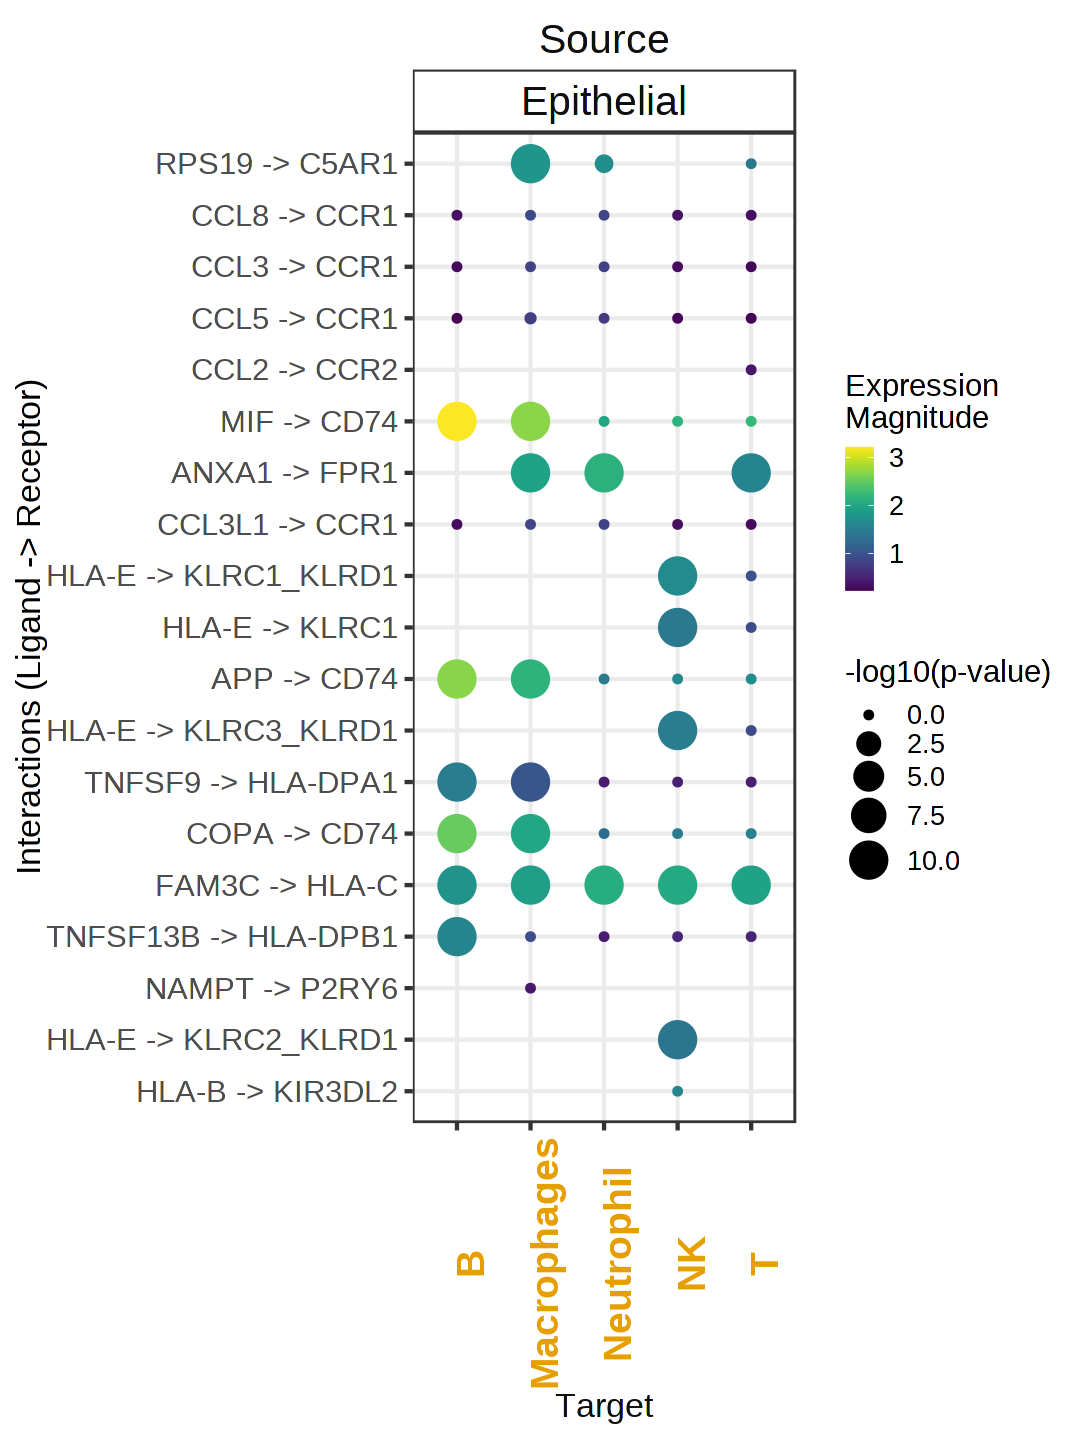

In [ ]:
options(repr.plot.height = 12, repr.plot.width = 9)
# Plot toy results
cpdb_result %>%
  # keep only the interactions of interest
  inner_join(cpdb_int,
             by = c("ligand.complex", "receptor.complex")) %>%
  # invert size (low p-value/high specificity = larger dot size)
  # + add a small value to avoid Infinity for 0s
  mutate(pvalue = -log10(pvalue + 1e-10)) %>%
  liana_dotplot(source_groups = c("Epithelial"),
                target_groups = c("Macrophages", "NK", "B", "T", "Neutrophil"),
                specificity = "pvalue",
                magnitude = "lr.mean",
                show_complex = TRUE,
                size.label = "-log10(p-value)") + theme(axis.text.x = element_text(angle = 90))

Similarly, we can explore the consensus results.

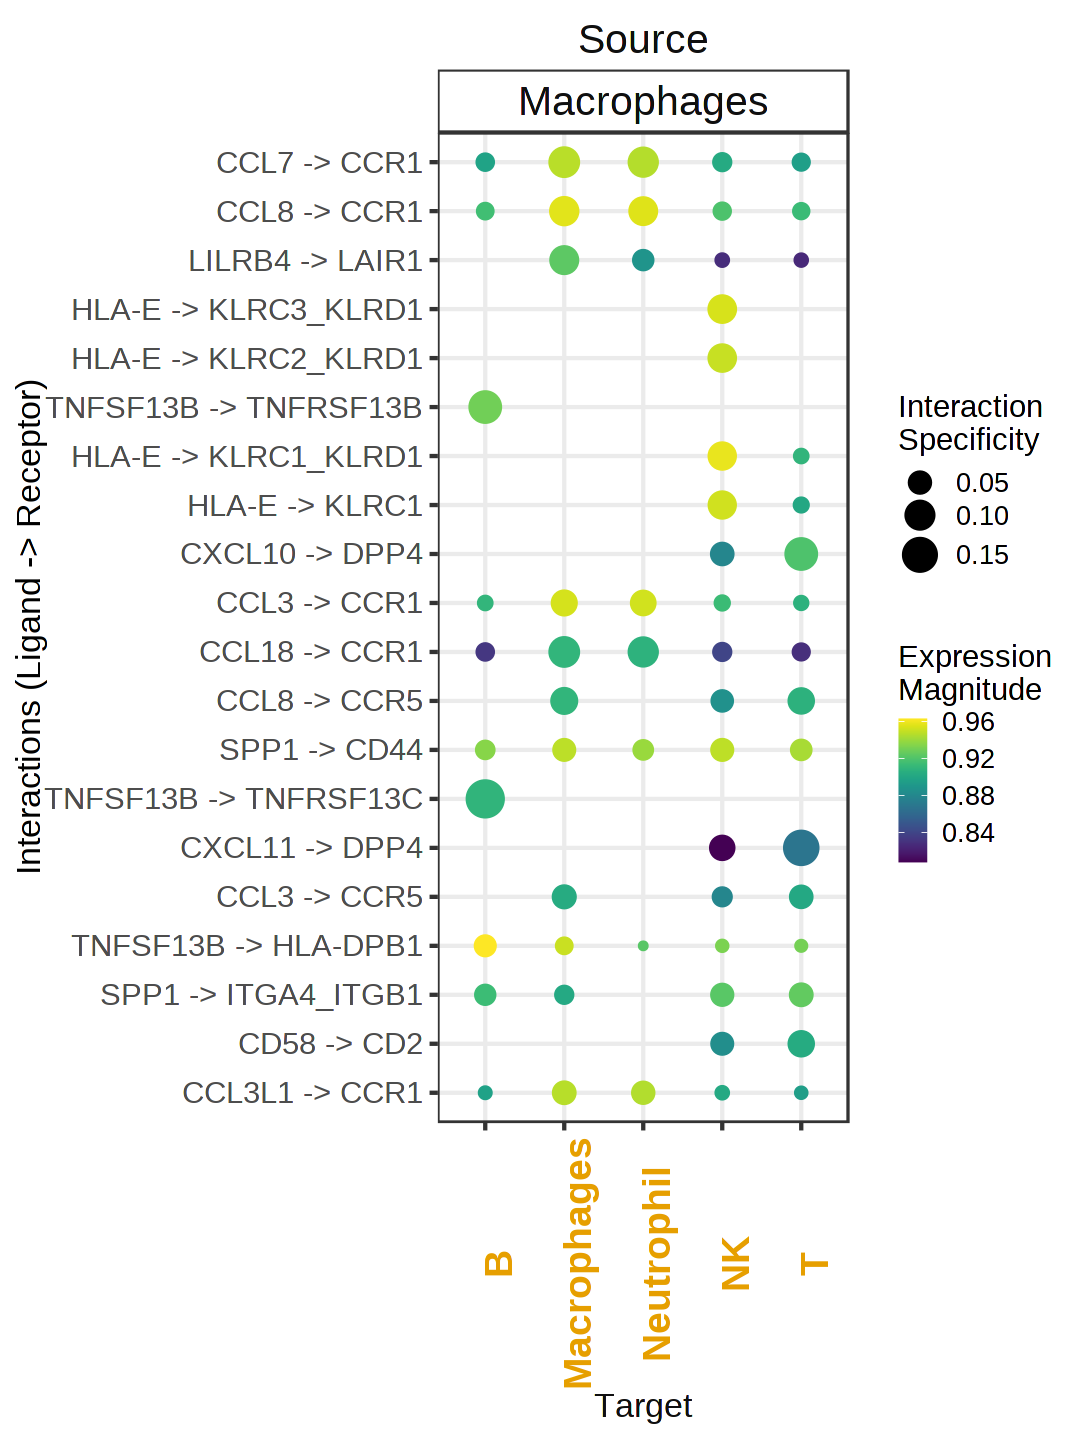

In [ ]:
options(repr.plot.height = 12, repr.plot.width = 9)
liana_consensus %>%
  liana_dotplot(source_groups = c("Macrophages"),
                target_groups = c("Macrophages", "NK", "B", "T", "Neutrophil"),
                ntop = 20) + theme(axis.text.x = element_text(angle = 90))

Overall potential of cells to commnucate can be computed. Here, we can count the number of significant/important interactions. Then, they can be visualized through a heatmap.

Similarly, we can compare the CellPhoneDB vs consensus results.

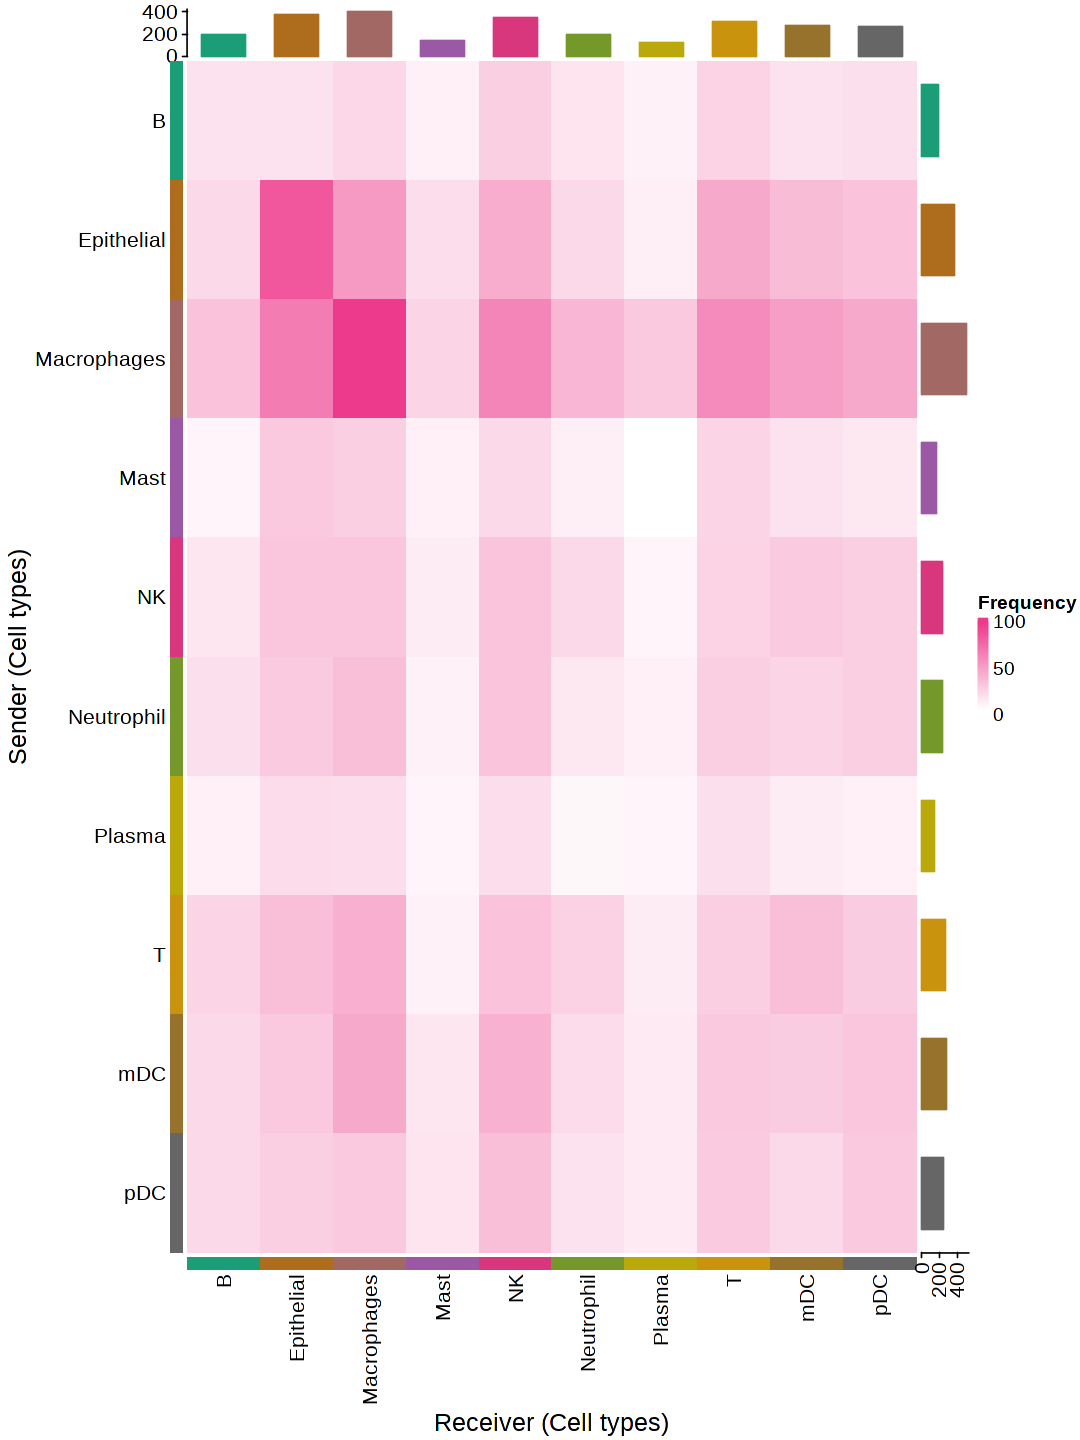

In [ ]:
liana_trunc <- cpdb_result %>%
   # only keep interactions concordant between methods
  filter(pvalue <= 0.05) # note that these pvals are already corrected

heat_freq(liana_trunc)

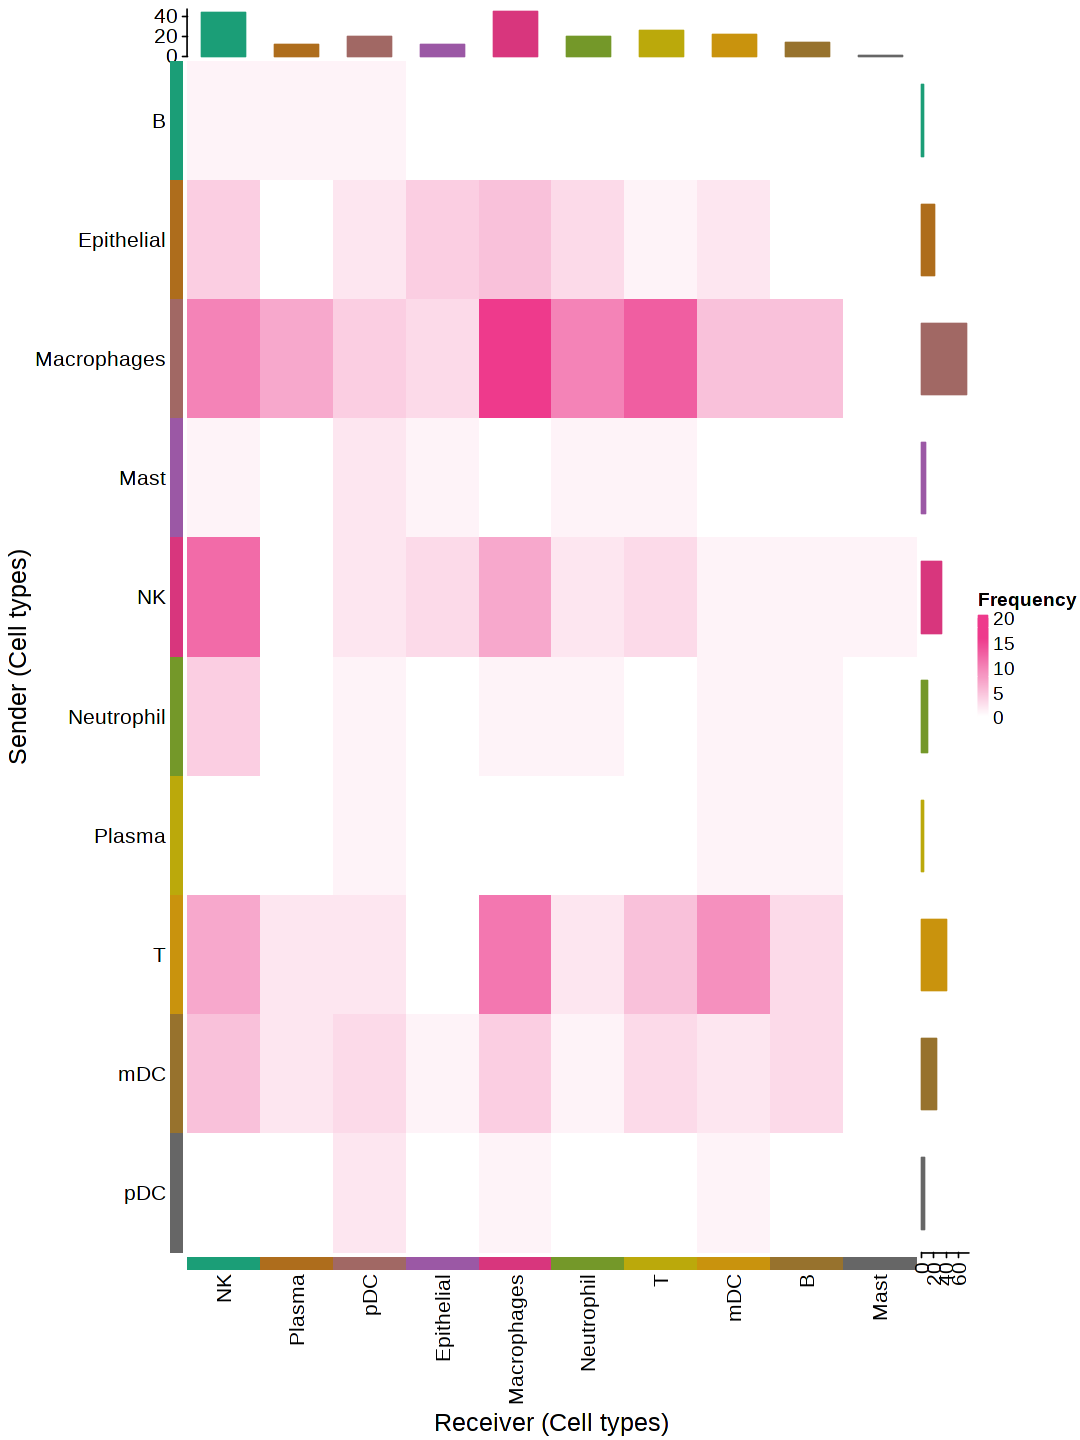

In [ ]:
liana_trunc <- liana_consensus %>%
   # only keep interactions concordant between methods
  filter(aggregate_rank <= 0.01) # note that these pvals are already corrected

heat_freq(liana_trunc)

## Extra Questions:

- How different are the results between two methods of your choice?

- Why can this happen?

- Can you summarize the number of LR pairs in each of the resources in LIANA?

- LIANA can be run on each of the samples. Can you compare a pair of conditions in the dataset? What are the main differences?

In [ ]:
ls("package:liana")